<a href="https://colab.research.google.com/github/pbcquoc/vietocr/blob/master/vietocr_gettingstart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Introduction
<p align="center">
<img src="https://raw.githubusercontent.com/pbcquoc/vietocr/master/image/vietocr.jpg" width="512" height="512">
</p>
This notebook describe how you can use VietOcr to train OCR model




In [ ]:
! pip install --quiet vietocr==0.1.9

     |████████████████████████████████| 40kB 3.0MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done


# Inference

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

from vietocr.tool.predictor import Predictor
from vietocr.tool.config import Cfg

In [ ]:
config = Cfg.load_config_from_name('vgg_transformer')

Change weights to your weights or using default weights from our pretrained model. Path can be url or local file

In [ ]:
# config['weights'] = './weights/transformerocr.pth'
config['weights'] = 'https://drive.google.com/uc?id=13327Y1tz1ohsm5YZMyXVMPIOjoOA0OaA'
config['device'] = 'cuda:0'
config['predictor']['beamsearch']=False

In [ ]:
detector = Predictor(config)

Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to /root/.cache/torch/checkpoints/vgg19_bn-c79401a0.pth


Cached Downloading: /root/.cache/gdown/https-COLON--SLASH--SLASH-drive.google.com-SLASH-uc-QUESTION-id-EQUAL-13327Y1tz1ohsm5YZMyXVMPIOjoOA0OaA
Downloading...
From: https://drive.google.com/uc?id=13327Y1tz1ohsm5YZMyXVMPIOjoOA0OaA
To: /root/.cache/gdown/tmpdug09yxm/dl
152MB [00:04, 32.5MB/s]


In [ ]:
! gdown --id 1uMVd6EBjY4Q0G2IkU5iMOQ34X0bysm0b
! unzip  -qq -o sample.zip

Downloading...
From: https://drive.google.com/uc?id=1uMVd6EBjY4Q0G2IkU5iMOQ34X0bysm0b
To: /content/sample.zip
100% 306k/306k [00:00<00:00, 78.3MB/s]


In [ ]:
! ls sample | shuf |head -n 5

2019_10_05_phung_vu_minh_phong_201910051031556_8.jpg
457_statuses_74396.jpg
463_Psi_60982.jpg
24775.jpg
030068003051.jpeg


'PHAN THỊ HỒNG THẮM'

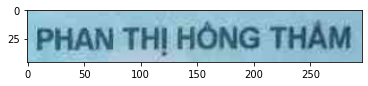

In [ ]:
img = './sample/072199003062.jpeg'
img = Image.open(img)
plt.imshow(img)
s = detector.predict(img)
s

# Download sample dataset

In [ ]:
! gdown https://drive.google.com/uc?id=1W2PZC94sjpA1lS7FN33VoIVleSnnWOaA 

Downloading...
From: https://drive.google.com/uc?id=1W2PZC94sjpA1lS7FN33VoIVleSnnWOaA
To: /content/data.zip
1.49GB [00:15, 97.9MB/s]


In [ ]:
! unzip -qq -o ./data.zip

# Train model



1.   Load your config
2.   Train model using your dataset above



Load the default config, we adopt VGG for image feature extraction

In [ ]:
from vietocr.tool.config import Cfg
from vietocr.model.trainer import Trainer

# Change the config 

* *data_root*: the folder save your all images
* *train_annotation*: path to train annotation
* *valid_annotation*: path to valid annotation
* *print_every*: show train loss at every n steps
* *valid_every*: show validation loss at every n steps
* *iters*: number of iteration to train your model
* *export*: export weights to folder that you can use for inference
* *metrics*: number of sample in validation annotation you use for computing full_sequence_accuracy, for large dataset it will take too long, then you can reuduce this number


In [ ]:
config = Cfg.load_config_from_name('vgg_transformer')

In [ ]:
config['vocab'] = 'aAàÀảẢãÃáÁạẠăĂằẰẳẲẵẴắẮặẶâÂầẦẩẨẫẪấẤậẬbBcCdDđĐeEèÈẻẺẽẼéÉẹẸêÊềỀểỂễỄếẾệỆfFgGhHiIìÌỉỈĩĨíÍịỊjJkKlLmMnNoOòÒỏỎõÕóÓọỌôÔồỒổỔỗỖốỐộỘơƠờỜởỞỡỠớỚợỢpPqQrRsStTuUùÙủỦũŨúÚụỤưƯừỪửỬữỮứỨựỰvVwWxXyYỳỲỷỶỹỸýÝỵỴzZ0123456789!"#$%&''()*+,-./:;<=>?@[\]^_`{|}~ '

dataset_params = {
    'name':'hw',
    'data_root':'./data/',
    'train_annotation':'train_annotation.txt',
    'valid_annotation':'test_annotation.txt'
}

params = {
         'print_every':200,
         'valid_every':15*200,
          'iters':20000,
          'checkpoint':'./checkpoint/transformerocr_checkpoint.pth',    
          'export':'./weights/transformerocr.pth',
          'metrics': 10000
         }

config['trainer'].update(params)
config['dataset'].update(dataset_params)
config['device'] = 'cuda:0'

you can change any of these params in this full list below

In [ ]:
config

{'backbone': 'vgg19_bn',
 'cnn': {'hidden': 256,
  'ks': [[2, 2], [2, 2], [2, 1], [2, 1], [1, 1]],
  'ss': [[2, 2], [2, 2], [2, 1], [2, 1], [1, 1]]},
 'dataloader': {'num_workers': 3, 'pin_memory': True},
 'dataset': {'data_root': './data/',
  'image_height': 32,
  'image_max_width': 512,
  'image_min_width': 32,
  'name': 'hw',
  'train_annotation': 'train_annotation.txt',
  'valid_annotation': 'test_annotation.txt'},
 'device': 'cuda:0',
 'optimizer': {'init_lr': 0.1, 'n_warmup_steps': 4000},
 'predictor': {'beamsearch': True},
 'pretrain': {'cached': '/tmp/tranformerorc.pth',
  'id_or_url': '13327Y1tz1ohsm5YZMyXVMPIOjoOA0OaA',
  'md5': '9cc606b70460261de374c56548aead5b'},
 'quiet': False,
 'trainer': {'batch_size': 32,
  'checkpoint': './checkpoint/transformerocr_checkpoint.pth',
  'export': './weights/transformerocr.pth',
  'iters': 20000,
  'log': './train.log',
  'metrics': 10000,
  'print_every': 200,
  'valid_every': 3000},
 'transformer': {'d_model': 256,
  'dim_feedforward': 

You should train model from our pretrained 

In [ ]:
trainer = Trainer(config, pretrained=True)

Cached Downloading: /tmp/tranformerorc.pth
Downloading...
From: https://drive.google.com/uc?id=13327Y1tz1ohsm5YZMyXVMPIOjoOA0OaA
To: /root/.cache/gdown/tmpfn7zae3h/dl
152MB [00:00, 205MB/s]


Computing MD5: /tmp/tranformerorc.pth
MD5 matches: /tmp/tranformerorc.pth


train_hw build cluster:  24%|██████▉                      | 21016/88530 [00:00<00:00, 210154.69it/s]

Created dataset with 88530 samples


valid_hw build cluster: 100%|█████████████████████████████| 29510/29510 [00:00<00:00, 186004.23it/s]

Created dataset with 29510 samples


Visualize your dataset to check data augmentation is appropriate

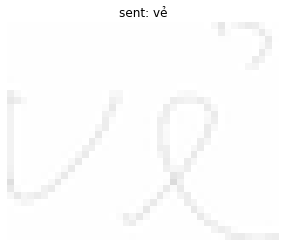

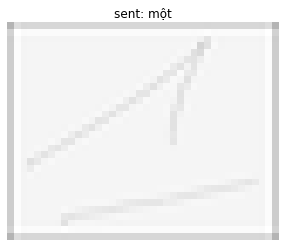

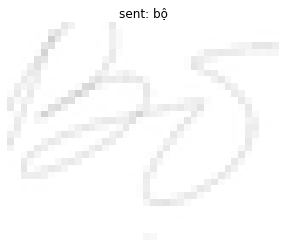

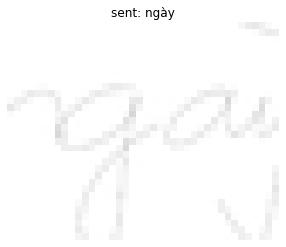

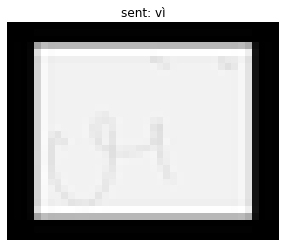

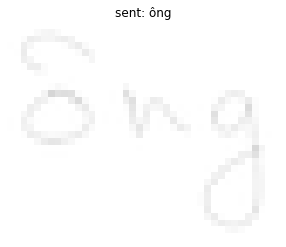

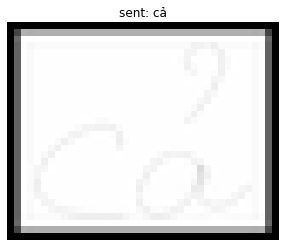

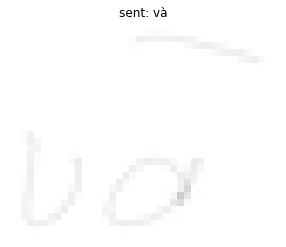

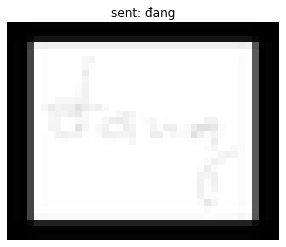

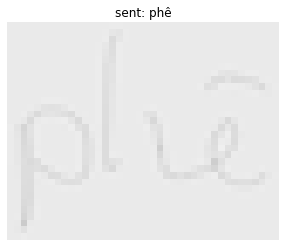

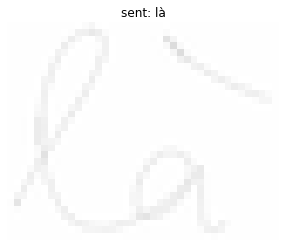

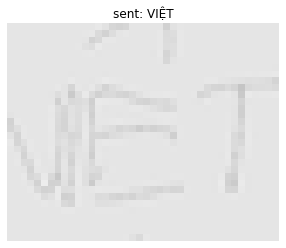

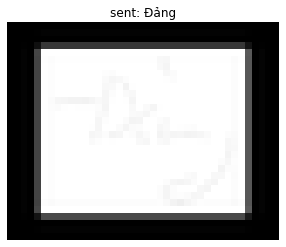

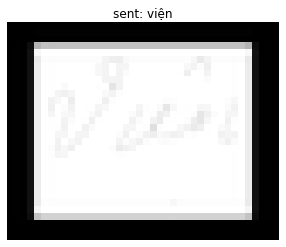

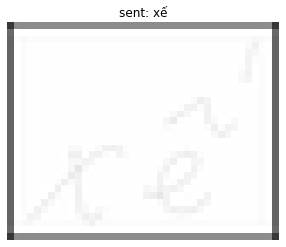

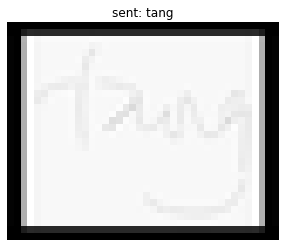

In [ ]:
trainer.visualize_dataset()

Train now

In [ ]:
trainer.train()

iter: 000200 - train loss: 1.530 - lr: 4.94e-06 - load time: 26.00 - gpu time: 38.40
iter: 000400 - train loss: 1.092 - lr: 9.88e-06 - load time: 26.42 - gpu time: 36.96
iter: 000600 - train loss: 0.948 - lr: 1.48e-05 - load time: 25.04 - gpu time: 38.00
iter: 000800 - train loss: 0.875 - lr: 1.98e-05 - load time: 25.38 - gpu time: 37.39
iter: 001000 - train loss: 0.838 - lr: 2.47e-05 - load time: 24.20 - gpu time: 38.70
iter: 001200 - train loss: 0.807 - lr: 2.96e-05 - load time: 25.88 - gpu time: 37.31
iter: 001400 - train loss: 0.733 - lr: 3.46e-05 - load time: 27.09 - gpu time: 37.49
iter: 001600 - train loss: 0.734 - lr: 3.95e-05 - load time: 27.75 - gpu time: 37.34
iter: 001800 - train loss: 0.761 - lr: 4.45e-05 - load time: 25.90 - gpu time: 37.13
iter: 002000 - train loss: 0.726 - lr: 4.94e-05 - load time: 26.42 - gpu time: 37.96
iter: 002200 - train loss: 0.741 - lr: 5.44e-05 - load time: 26.04 - gpu time: 37.58
iter: 002400 - train loss: 0.743 - lr: 5.93e-05 - load time: 24.4

Visualize prediction from our trained model


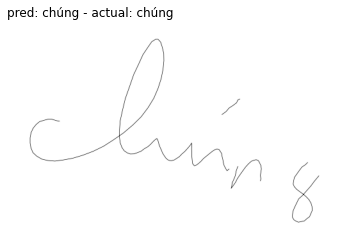

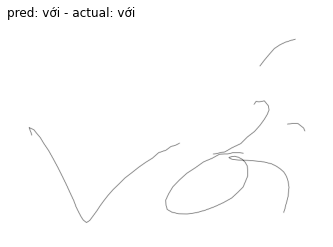

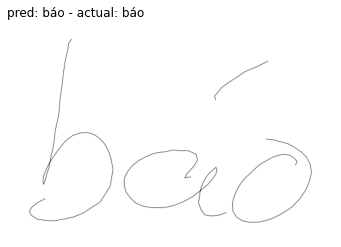

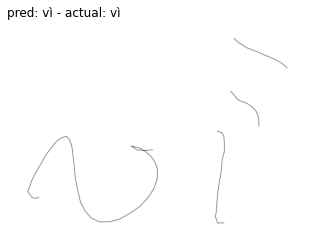

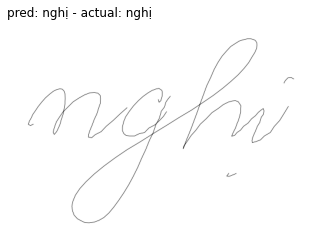

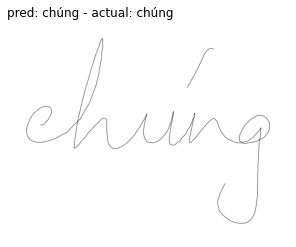

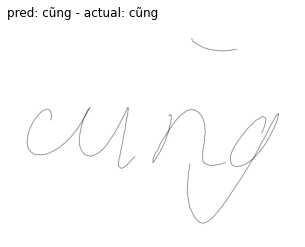

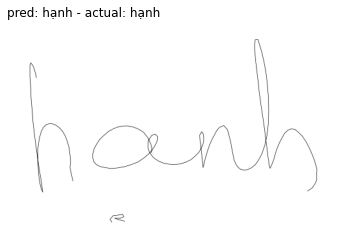

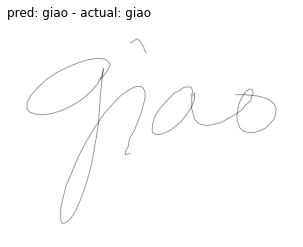

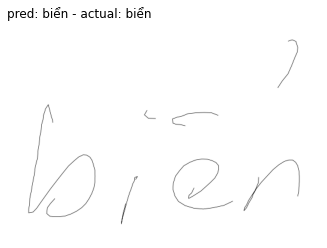

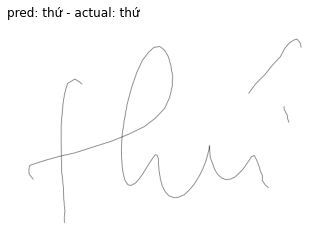

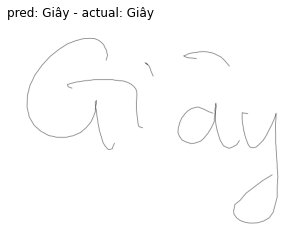

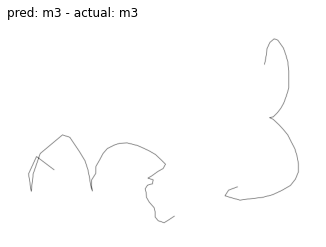

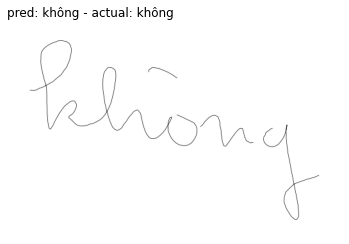

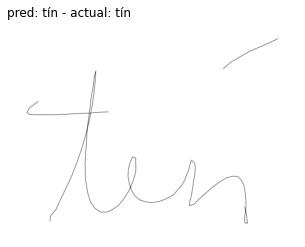

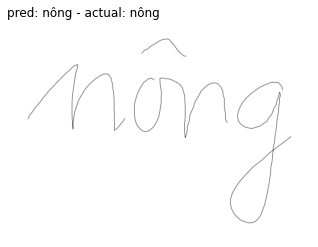

In [ ]:
trainer.visualize_prediction()

Compute full seq accuracy for full valid dataset

In [ ]:
trainer.precision()

(0.8485497237569061, 0.9084443)